In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/letterdata.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.shape

(20000, 17)

In [4]:
# Seperate the data
x= df.drop('letter',axis=1)
y=df['letter']

In [5]:
y.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

<Axes: xlabel='count', ylabel='letter'>

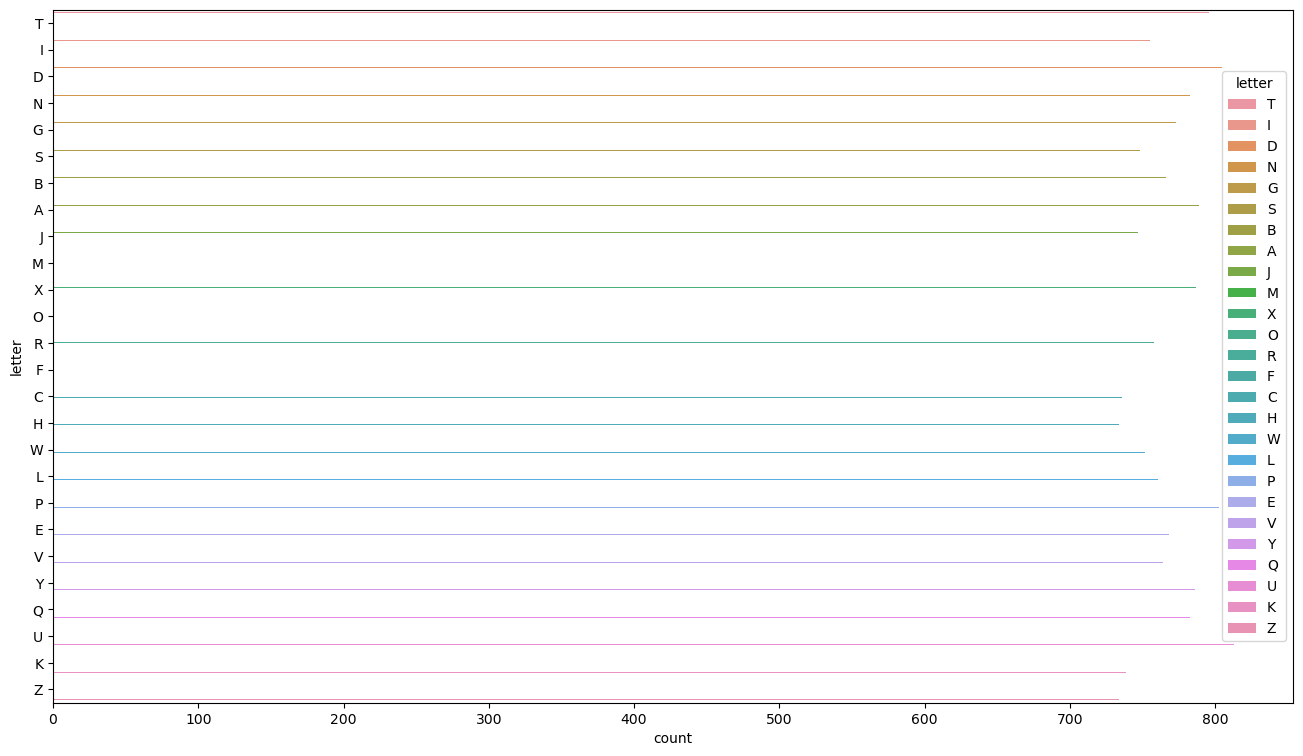

In [6]:
plt.figure(figsize=(16,9))
sns.countplot(y=y,hue=y)

In [7]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [8]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [9]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0, stratify=y, test_size=0.20)

In [12]:
x_train.shape

(16000, 16)

In [13]:
# Build the Model
from sklearn.svm import SVC

In [54]:
#svc= SVC(kernel='linear', random_state=0)
#svc= SVC(kernel='rbf', random_state=0)
svc= SVC(kernel='poly', random_state=0)
#svc= SVC(kernel='sigmoid', random_state=0)

In [55]:
svc.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [56]:
y_pred= svc.predict(x_test)

In [57]:
y_pred

array(['A', 'H', 'S', ..., 'I', 'B', 'L'], dtype=object)

In [58]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [59]:
print(confusion_matrix(y_test,y_pred))

[[156   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 142   0   0   1   0   0   2   0   0   0   0   0   2   0   0   0   4
    1   0   0   1   0   0   0   0]
 [  0   0 144   0   1   0   1   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 157   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 145   0   5   0   0   0   0   0   0   0   0   0   1   0
    1   0   0   0   0   1   0   0]
 [  0   0   1   0   1 148   0   1   0   0   0   0   0   1   0   1   0   0
    1   1   0   0   0   0   0   0]
 [  0   0   1   2   1   0 145   0   0   0   0   0   0   0   2   0   2   2
    0   0   0   0   0   0   0   0]
 [  0   0   2   4   1   1   0 133   0   0   4   0   0   0   0   0   1   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0 147   1   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [60]:
accuracy_score(y_test,y_pred)

0.949

<Figure size 1600x900 with 0 Axes>

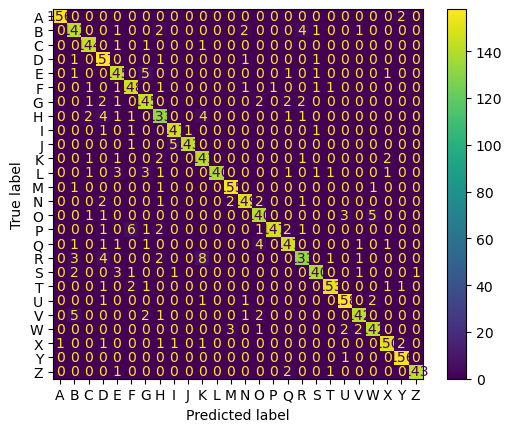

In [61]:
plt.figure(figsize=(16,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       158
           B       0.91      0.93      0.92       153
           C       0.95      0.98      0.97       147
           D       0.89      0.98      0.93       161
           E       0.91      0.94      0.93       154
           F       0.93      0.95      0.94       155
           G       0.91      0.94      0.92       155
           H       0.90      0.90      0.90       147
           I       0.95      0.97      0.96       151
           J       0.99      0.96      0.98       149
           K       0.90      0.95      0.93       148
           L       1.00      0.92      0.96       152
           M       0.97      0.98      0.97       158
           N       0.96      0.95      0.96       157
           O       0.92      0.93      0.93       150
           P       0.99      0.91      0.95       161
           Q       0.94      0.94      0.94       157
           R       0.93    

In [63]:
new= x_test.iloc[[34,675,123,2045,332,3567],:]

In [64]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6242,2,3,4,2,2,8,8,4,4,8,5,7,2,7,4,10
2211,2,7,4,5,3,12,3,2,2,9,2,9,3,7,3,9
14363,7,11,6,6,3,6,10,2,6,11,7,5,2,9,6,5
9494,2,9,3,7,1,15,2,6,5,14,1,9,0,7,0,8
6354,1,0,2,0,0,7,10,3,1,7,12,8,1,11,0,8
4121,2,1,2,1,1,5,11,7,1,9,6,4,1,9,3,8


In [65]:
y_p= svc.predict(new)
y_p

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

In [67]:
y_test.iloc[[34,675,123,2045,332,3567]].values

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)